In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import mne
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import ghibtools as gh
import pandas as pd
import seaborn as sns
from params import *
from bibliotheque import get_pos, df_baseline, get_df_mask_chan_signif, keep_clean, cluster_stats
from compute_global_dataframes import bandpower_concat_job, oas_concat_job, bmrq_concat_job
from compute_psd import psd_baselined_job
from configuration import base_folder
import os
import scipy

In [3]:
mask_params = dict(markersize=15, markerfacecolor='y')

In [4]:
pos = get_pos()

In [5]:
metrics = ['power_mean','power_median','power_integral','relative_power']
indexes = ['band','session','chan','participant']

In [6]:
bandpower = bandpower_concat_job.get(global_key).to_dataframe()
bandpower = keep_clean(bandpower, metrics)

In [7]:
bandpower

dim_0 participant session chan             band  power_mean   
0          0         P01   music  Fp1            delta    2.744871  \
1          1         P01   music  Fp1            theta    3.306719   
2          2         P01   music  Fp1            alpha    4.619454   
3          3         P01   music  Fp1             beta    2.036753   
4          4         P01   music  Fp1        low_gamma    0.648942   
...      ...         ...     ...  ...              ...         ...   
13435  13435         P31    odor   Cz            alpha    0.750246   
13436  13436         P31    odor   Cz             beta    0.795917   
13437  13437         P31    odor   Cz        low_gamma    0.873059   
13438  13438         P31    odor   Cz       high_gamma    0.988384   
13439  13439         P31    odor   Cz  very_high_gamma    1.041684   

       power_median  power_integral  relative_power  stai_state  stai_trait   
0          2.729437        8.238434        3.075915          40          61  \
1          3.196230       13.309333        4.969194          40          61   
2          4.600284       18.679399        6.974170          40          61   
3          1.471614       36.561516       13.650666          40          61   
4          0.626061        9.722268        3.629921          40          61   
...             ...             ...             ...         ...         ...   
13435      0.757082        3.000453        3.826594          29          40   
13436      0.791439       14.334915       18.281871          29          40   
13437      0.874083       13.107799       16.716883          29          40   
13438      0.976072       44.519482       56.777418          29          40   
13439      1.038406      104.192016      132.880109          29          40   

       keep_session Gender  Maia_Mean       OAS      BMRQ  
0                 1      F   1.019643  2.666667  2.727273  
1                 1      F   1.019643  2.666667  2.727273  
2                 1      F   1.019643  2.666667  2.727273  
3                 1      F   1.019643  2.666667  2.727273  
4                 1      F   1.019643  2.666667  2.727273  
...             ...    ...        ...       ...       ...  
13435             1      M   2.790774  2.933333  2.681818  
13436             1      M   2.790774  2.933333  2.681818  
13437             1      M   2.790774  2.933333  2.681818  
13438             1      M   2.790774  2.933333  2.681818  
13439             1      M   2.790774  2.933333  2.681818  

[13440 rows x 16 columns]

<AxesSubplot: >

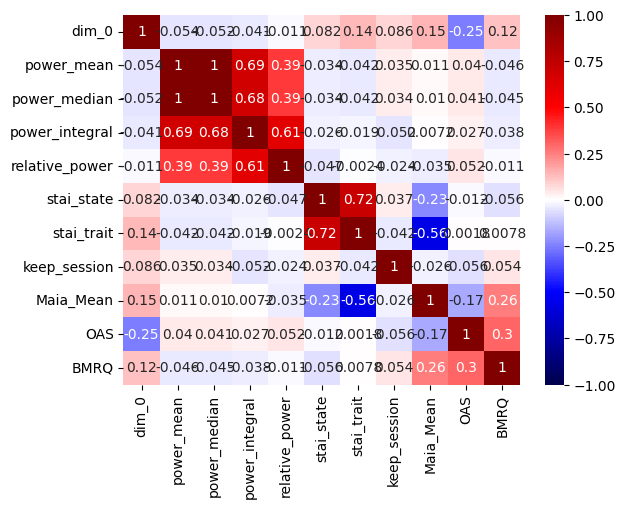

In [8]:
sns.heatmap(bandpower.corr(numeric_only = True), annot =True, vmin = -1, vmax = 1, cmap = 'seismic')

<AxesSubplot: xlabel='band', ylabel='power_integral'>

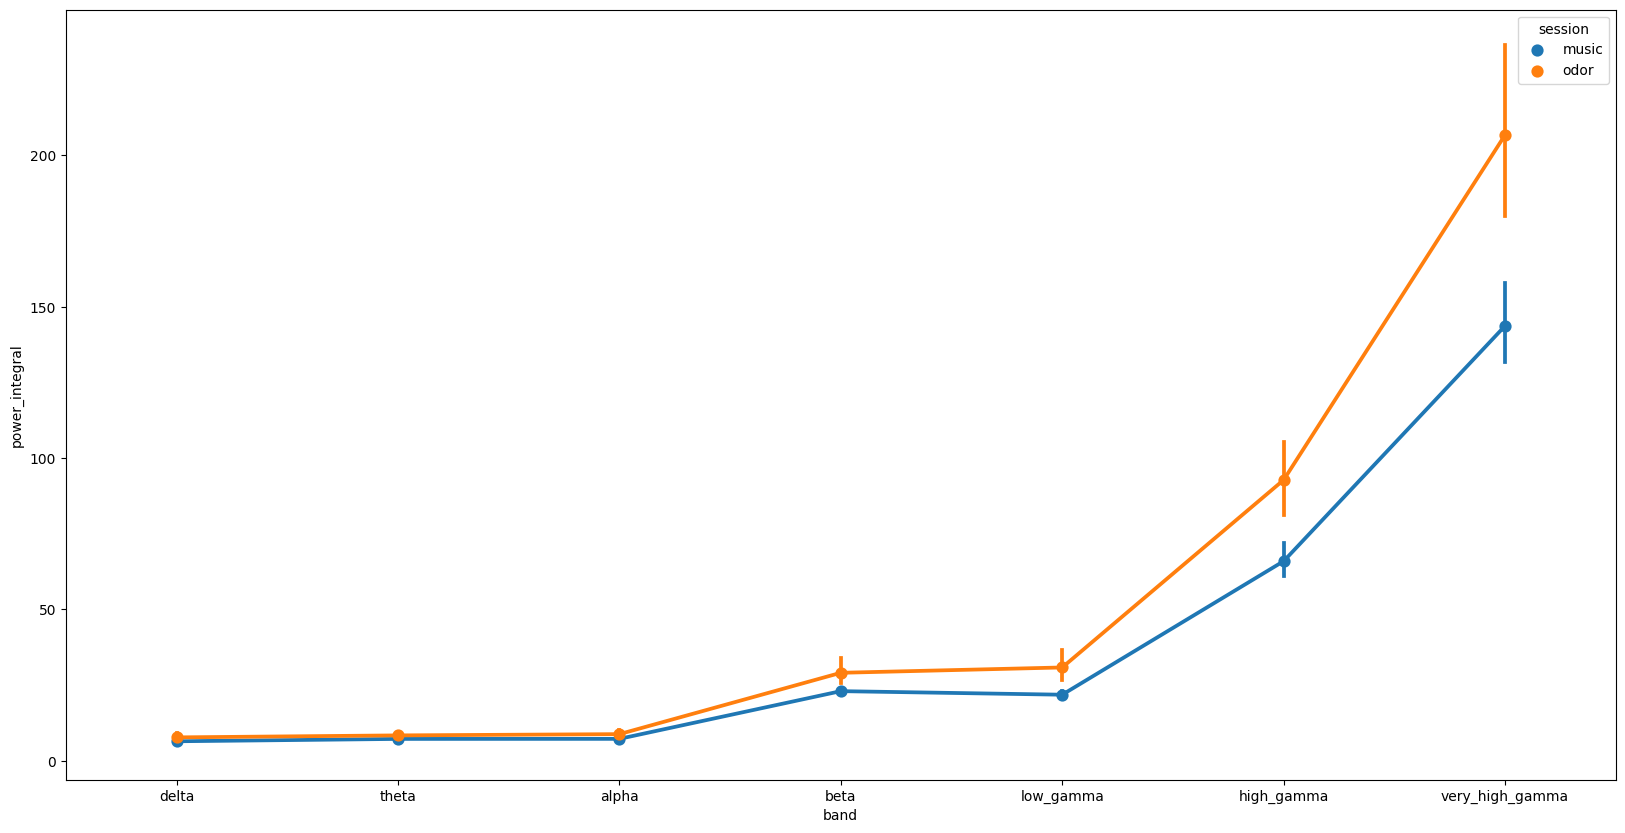

In [9]:
fig, ax = plt.subplots(figsize = (20,10))
sns.pointplot(data=bandpower, x = 'band', y = 'power_integral', hue = 'session',ax=ax)

In [10]:
bandpower

dim_0 participant session chan             band  power_mean   
0          0         P01   music  Fp1            delta    2.744871  \
1          1         P01   music  Fp1            theta    3.306719   
2          2         P01   music  Fp1            alpha    4.619454   
3          3         P01   music  Fp1             beta    2.036753   
4          4         P01   music  Fp1        low_gamma    0.648942   
...      ...         ...     ...  ...              ...         ...   
13435  13435         P31    odor   Cz            alpha    0.750246   
13436  13436         P31    odor   Cz             beta    0.795917   
13437  13437         P31    odor   Cz        low_gamma    0.873059   
13438  13438         P31    odor   Cz       high_gamma    0.988384   
13439  13439         P31    odor   Cz  very_high_gamma    1.041684   

       power_median  power_integral  relative_power  stai_state  stai_trait   
0          2.729437        8.238434        3.075915          40          61  \
1          3.196230       13.309333        4.969194          40          61   
2          4.600284       18.679399        6.974170          40          61   
3          1.471614       36.561516       13.650666          40          61   
4          0.626061        9.722268        3.629921          40          61   
...             ...             ...             ...         ...         ...   
13435      0.757082        3.000453        3.826594          29          40   
13436      0.791439       14.334915       18.281871          29          40   
13437      0.874083       13.107799       16.716883          29          40   
13438      0.976072       44.519482       56.777418          29          40   
13439      1.038406      104.192016      132.880109          29          40   

       keep_session Gender  Maia_Mean       OAS      BMRQ  
0                 1      F   1.019643  2.666667  2.727273  
1                 1      F   1.019643  2.666667  2.727273  
2                 1      F   1.019643  2.666667  2.727273  
3                 1      F   1.019643  2.666667  2.727273  
4                 1      F   1.019643  2.666667  2.727273  
...             ...    ...        ...       ...       ...  
13435             1      M   2.790774  2.933333  2.681818  
13436             1      M   2.790774  2.933333  2.681818  
13437             1      M   2.790774  2.933333  2.681818  
13438             1      M   2.790774  2.933333  2.681818  
13439             1      M   2.790774  2.933333  2.681818  

[13440 rows x 16 columns]

In [11]:
bandpower_mean = bandpower.groupby(['session','chan','band']).median(True).reset_index()

In [12]:
bandpower_mean.columns

Index(['session', 'chan', 'band', 'dim_0', 'power_mean', 'power_median',
       'power_integral', 'relative_power', 'stai_state', 'stai_trait',
       'keep_session', 'Maia_Mean', 'OAS', 'BMRQ'],
      dtype='object')

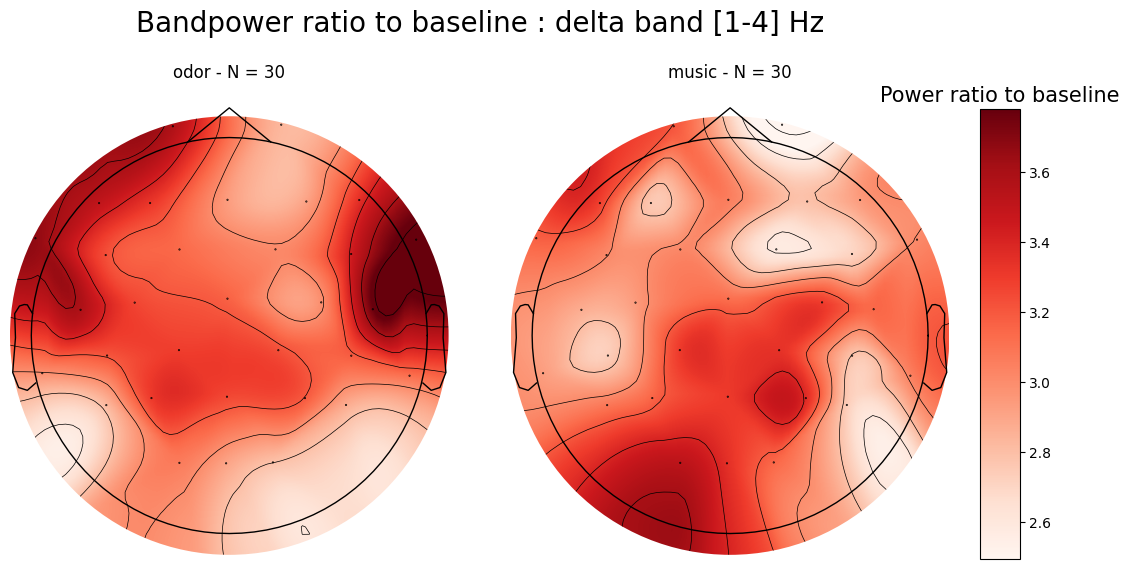

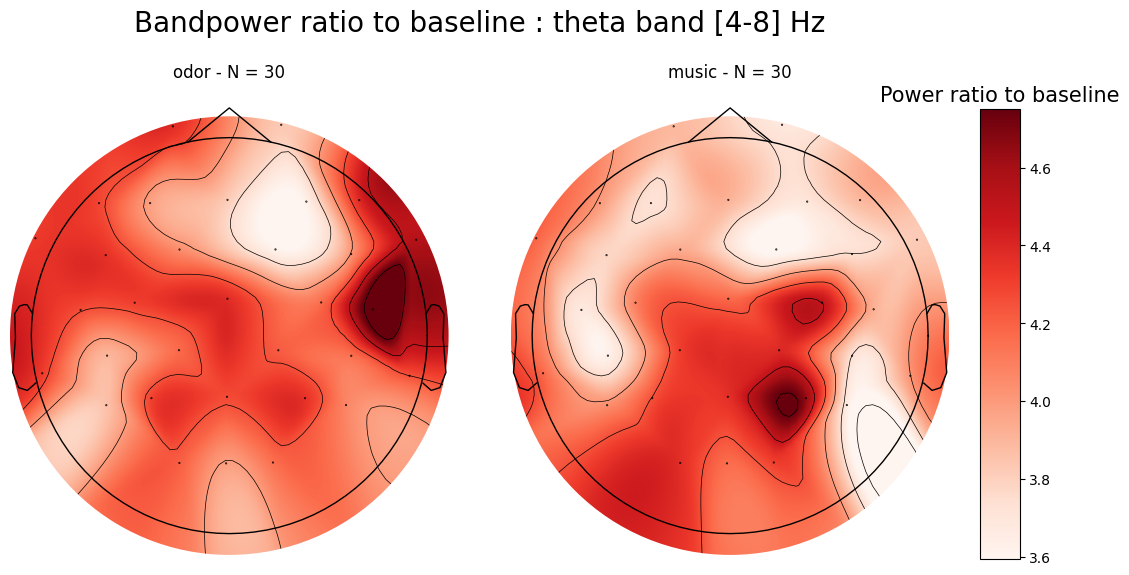

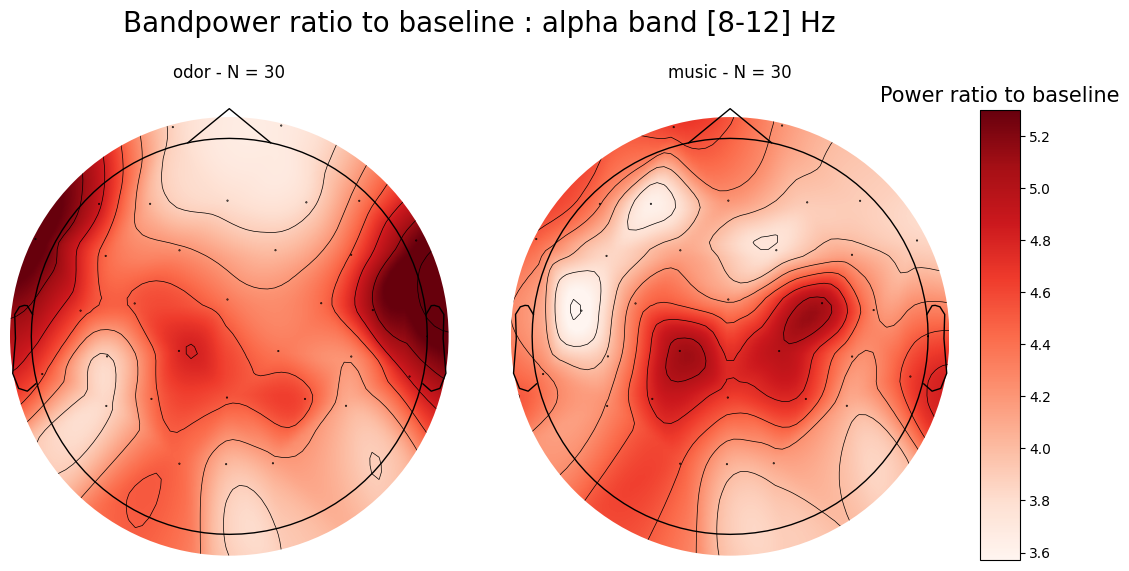

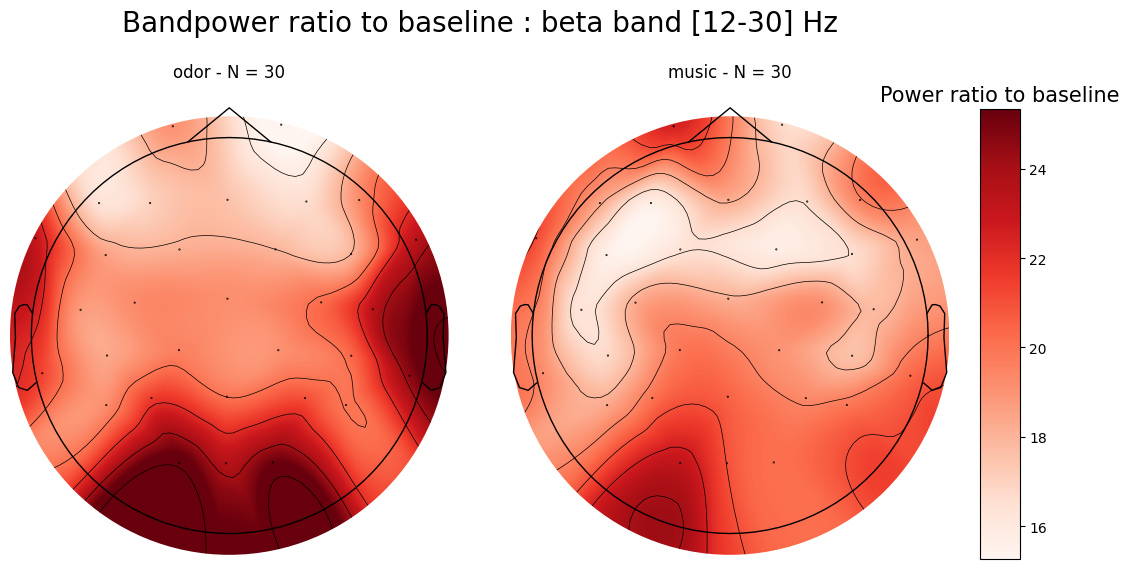

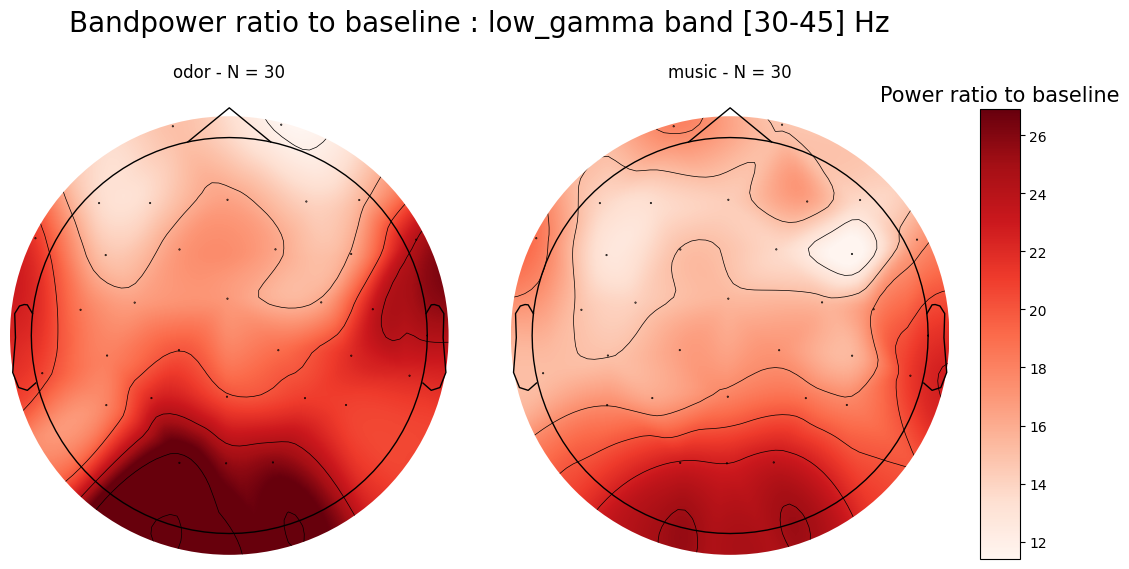

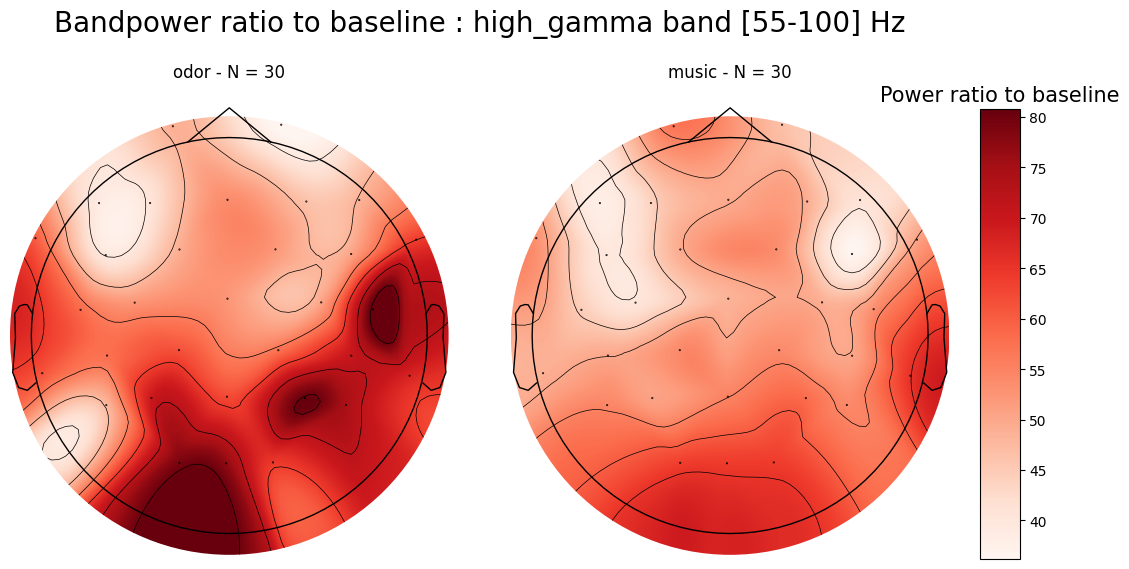

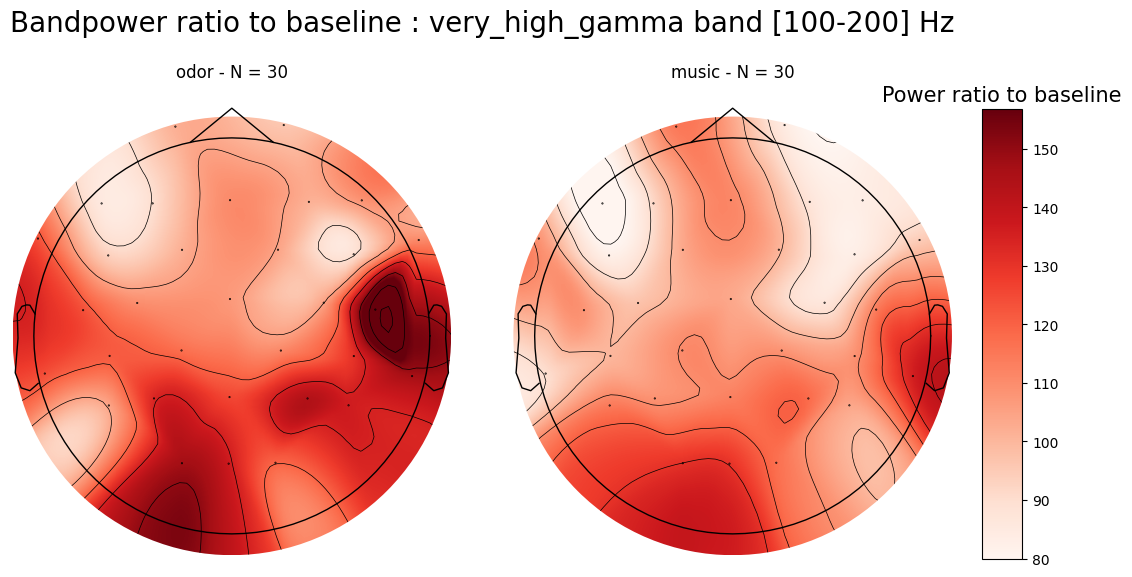

In [13]:
metric = 'power_integral'

N = len(subject_keys)

for band in fbands.keys():
    bandpower_of_band_sub = bandpower[bandpower['band'] == band]
    df_mask = get_df_mask_chan_signif(df = bandpower_of_band_sub, chans = eeg_chans, predictor = 'session', outcome = metric, subject = 'participant')
    
    bandpower_of_band = bandpower_mean[bandpower_mean['band'] == band]
    
    lc = fbands[band][0]
    hc = fbands[band][1]
    
    delta = 0.01
    mini = bandpower_of_band[metric].quantile(delta)
    maxi = bandpower_of_band[metric].quantile(1 - delta)
    
    vlim = (mini,maxi)

    fig, axs = plt.subplots(ncols = bandpower_of_band['session'].unique().size,figsize = (10,5), constrained_layout = True)
    fig.suptitle(f'Bandpower ratio to baseline : {band} band [{lc}-{hc}] Hz', fontsize = 20, y = 1.1)
    for c, session in enumerate(['odor','music']):
        ax = axs[c]
        mask = bandpower_of_band[bandpower_of_band['session'] == session]
        data_ready = mask.groupby('chan').mean(numeric_only = True)[metric].reindex(eeg_chans)
        data = data_ready.values
        im, _ = mne.viz.plot_topomap(data=data,pos = pos, names = eeg_chans, axes=ax, show = False, vlim=vlim, cmap = 'Reds', mask = df_mask['mask_corr'], mask_params = mask_params)
        
        ax.set_title(f'{session} - N = {N}')
        
    ax_x_start = 1
    ax_x_width = 0.04
    ax_y_start = 0
    ax_y_height = 0.9
    cbar_ax = fig.add_axes([ax_x_start, ax_y_start, ax_x_width, ax_y_height])
    clb = fig.colorbar(im, cax=cbar_ax)
    clb.ax.set_title('Power ratio to baseline',fontsize=15)
    
    file = base_folder / 'Figures' / 'bandpower' / 'global' / f'{band}.png'
    

    fig.savefig(file, bbox_inches = 'tight')


/tmp/ipykernel_12596/3610296992.py:6: RuntimeWarning: No clusters found, returning empty H0, clusters, and cluster_pv
  t_obs, clusters, cluster_p_values, H0 = mne.stats.permutation_cluster_1samp_test(X, out_type = 'indices', verbose = False)


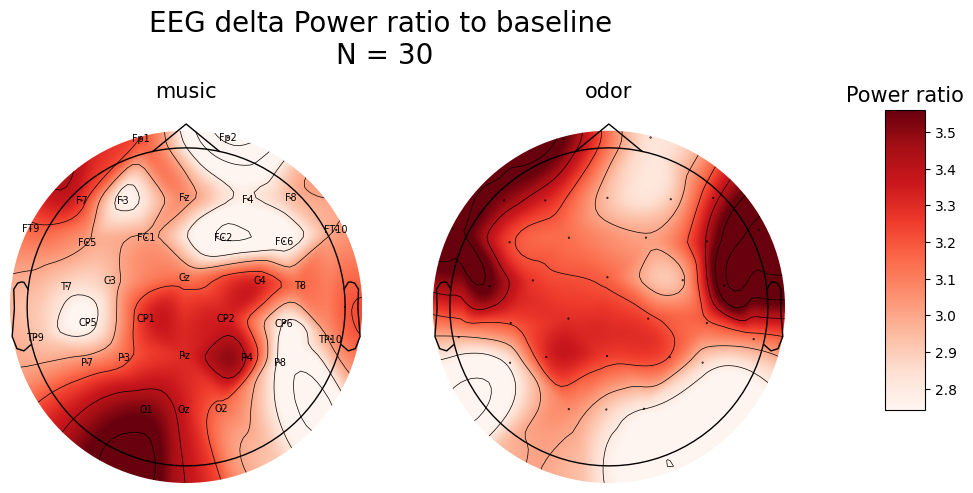

/tmp/ipykernel_12596/3610296992.py:6: RuntimeWarning: No clusters found, returning empty H0, clusters, and cluster_pv
  t_obs, clusters, cluster_p_values, H0 = mne.stats.permutation_cluster_1samp_test(X, out_type = 'indices', verbose = False)


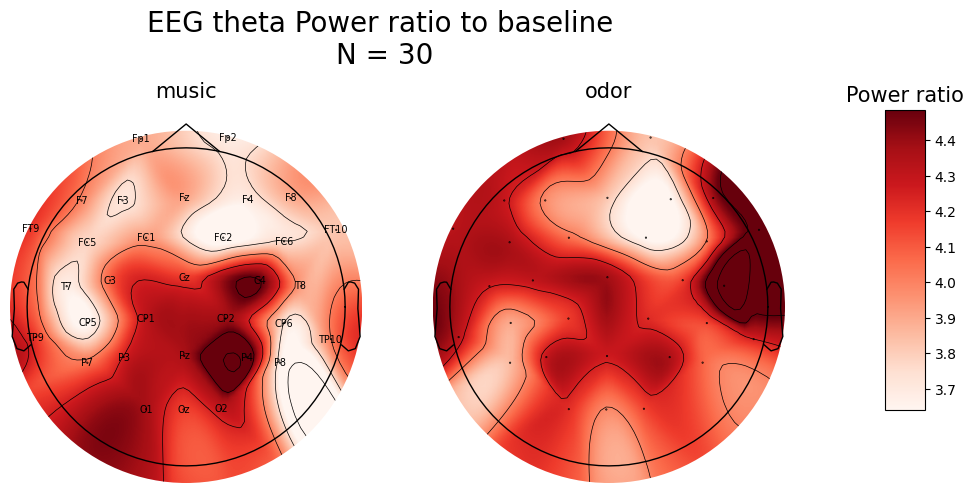

/tmp/ipykernel_12596/3610296992.py:6: RuntimeWarning: No clusters found, returning empty H0, clusters, and cluster_pv
  t_obs, clusters, cluster_p_values, H0 = mne.stats.permutation_cluster_1samp_test(X, out_type = 'indices', verbose = False)


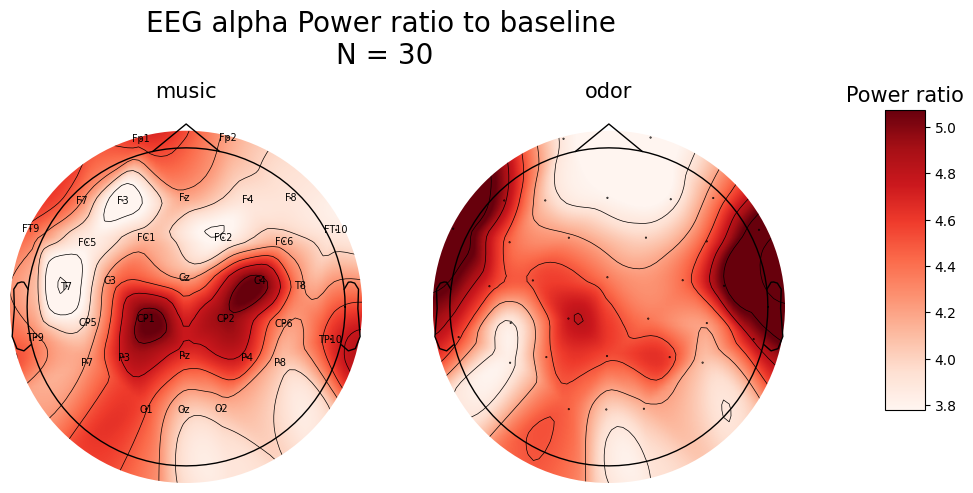

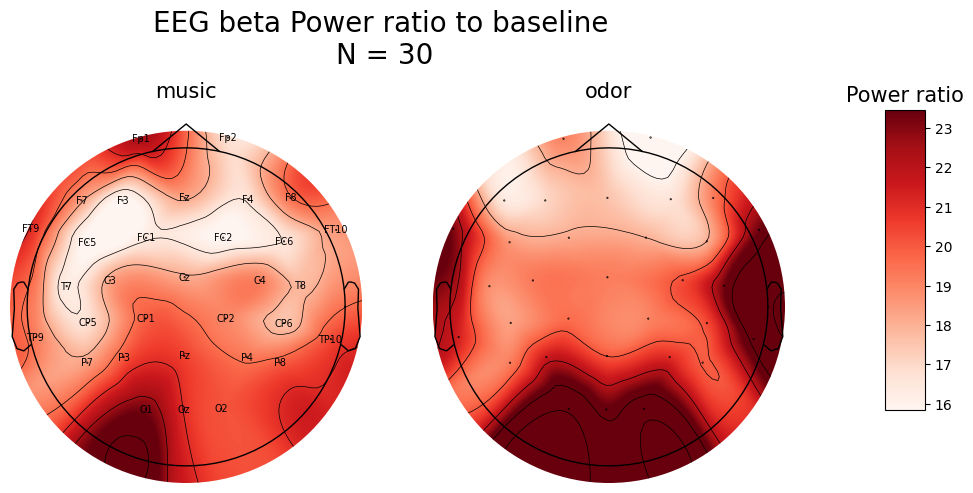

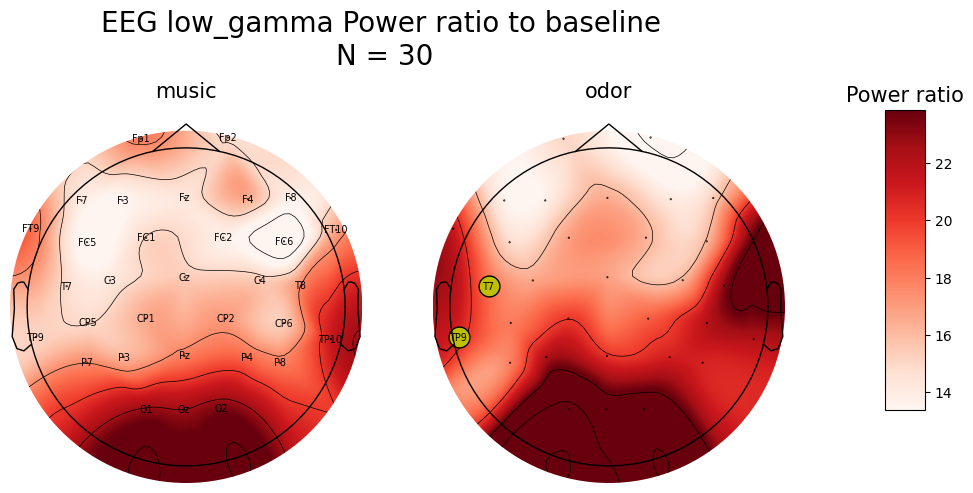

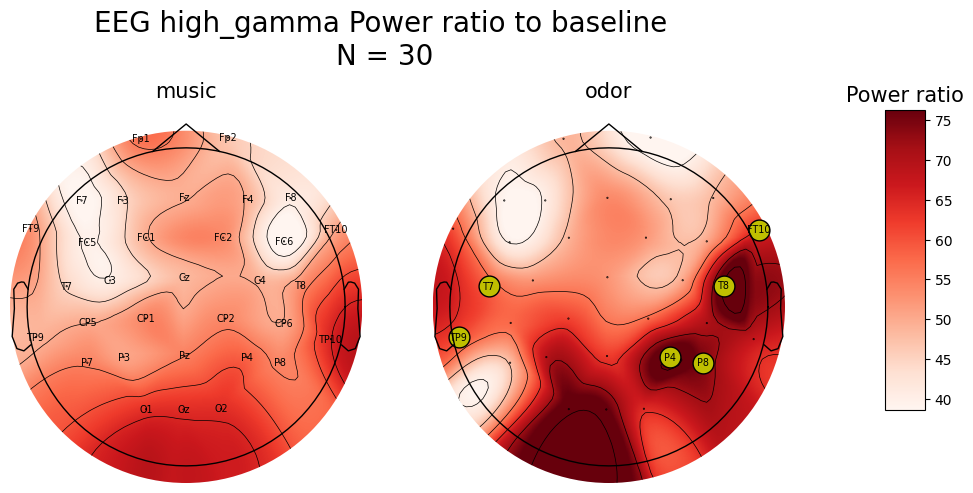

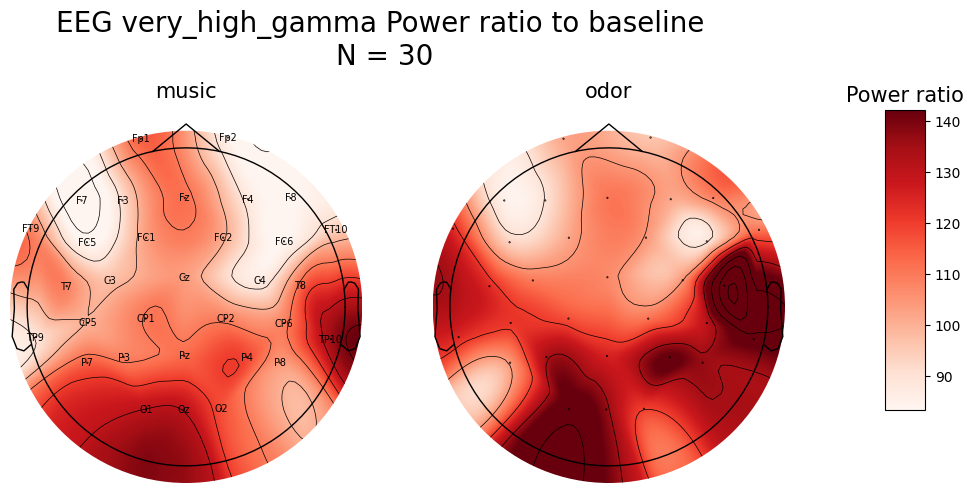

In [14]:
import xarray as xr
import ghibtools as gh

def cluster_stats(x1,x2, chans):
    X = x2 - x1
    t_obs, clusters, cluster_p_values, H0 = mne.stats.permutation_cluster_1samp_test(X, out_type = 'indices', verbose = False)

    mask_signif_chans = np.full(len(ch_names), False)

    chan_inds_signif = []
    for cluster, p  in zip(clusters, cluster_p_values):
        if p < 0.05:
            chan_inds_signif.extend(list(cluster[0]))
    mask_signif_chans[chan_inds_signif] = True
    return  mask_signif_chans

metric = 'power_integral'

bandpower = bandpower_concat_job.get(global_key).to_dataframe()
bandpower = keep_clean(bandpower, metrics)
# bandpower[metric] = np.log(bandpower[metric].values)

for band in fbands.keys():
    df = bandpower[bandpower['band'] == band]

    ch_names = df['chan'].unique()
    da = gh.init_da({'session':df['session'].unique(), 'participant':df['participant'].unique(), 'chan':ch_names})
    for ses in da['session'].values:
        for participant in da['participant'].values:
            for chan in da['chan'].values:
                da.loc[ses,participant,chan] = df.set_index(['session','participant','chan']).loc[(ses,participant,chan),metric]

    q_diff = 0.05

    mask_params = dict(markersize=15, markerfacecolor='y')

    N = df['participant'].unique().size

    vmin = df.groupby(['session','chan']).median(numeric_only = True)[metric].quantile(q_diff)
    vmax = df.groupby(['session','chan']).median(numeric_only = True)[metric].quantile(1 - q_diff)

    fig, axs = plt.subplots(ncols = df['session'].unique().size, figsize = (10,5))
    fig.suptitle(f'EEG {band} Power ratio to baseline \nN = {N}', fontsize = 20, y = 1.1)

    chans = da['chan'].values

    for c, session in enumerate(df['session'].unique()):
        ax = axs[c]
        topo_data = df[df['session'] == session].groupby('chan').median(numeric_only = True)[metric].reindex(chans)
        
        if c ==0:
            im, cn = mne.viz.plot_topomap(data = topo_data.values , pos = pos, names = chans, axes = ax, show = False, vlim = (vmin,vmax))
        else:
            x1 = da.sel(session = 'odor').values
            x2 = da.sel(session = 'music').values
            mask = cluster_stats(x1,x2,chans)
            im, cn = mne.viz.plot_topomap(data = topo_data.values , pos = pos, names = chans, axes = ax, show = False, vlim = (vmin,vmax), mask = mask, mask_params = mask_params)
        ax.set_title(f'{session}', fontsize = 15)

    ax_x_start = 1
    ax_x_width = 0.04
    ax_y_start = 0.3
    ax_y_height = 0.6
    cbar_ax = fig.add_axes([ax_x_start, ax_y_start, ax_x_width, ax_y_height])
    clb = fig.colorbar(im, cax=cbar_ax)
    clb.ax.set_title('Power ratio',fontsize=15)

    fig.savefig(base_folder / 'Figures' / 'bandpower' / 'global' / f'{band}_cluster_stats.png', dpi = 300, bbox_inches = 'tight')

    plt.show()

In [15]:
oas = oas_concat_job.get(global_key).to_dataframe().set_index('participant')
bmrq = bmrq_concat_job.get(global_key).to_dataframe().set_index('participant')

In [ ]:
N = len(subject_keys)

for subject in subject_keys:
    bandpower_subject = bandpower[bandpower['participant'] == subject]
    bmrq_sub = bmrq.loc[subject, 'BMRQ'].round(3)
    oas_sub = oas.loc[subject, 'OAS'].round(3)
    for band in fbands.keys():
        bandpower_of_band = bandpower_subject[bandpower_subject['band'] == band]

        lc = fbands[band][0]
        hc = fbands[band][1]

        delta = 0.05
        mini = bandpower_of_band['power_integral'].quantile(delta)
        maxi = bandpower_of_band['power_integral'].quantile(1 - delta)
        vlim = (mini,maxi)

        fig, axs = plt.subplots(ncols = bandpower_of_band['session'].unique().size,figsize = (10,5), constrained_layout = True)
        fig.suptitle(f'{subject} - Bandpower ratio to baseline : {band} band [{lc}-{hc}] Hz \n OAS : {oas_sub} - BMRQ : {bmrq_sub}', fontsize = 20, y = 1.1)
        for c, session in enumerate(['odor','music']):
            ax = axs[c]
            mask = bandpower_of_band[bandpower_of_band['session'] == session]
            data_ready = mask.groupby('chan').mean(numeric_only = True)['power_integral'].reindex(eeg_chans)
            data = data_ready.values
            im, _ = mne.viz.plot_topomap(data=data,pos = pos, names = eeg_chans, axes=ax, show = False, vlim=vlim, cmap = 'Reds')

            ax.set_title(f'{session}')

        ax_x_start = 1
        ax_x_width = 0.04
        ax_y_start = 0
        ax_y_height = 0.9
        cbar_ax = fig.add_axes([ax_x_start, ax_y_start, ax_x_width, ax_y_height])
        clb = fig.colorbar(im, cax=cbar_ax)
        clb.ax.set_title('Power ratio to baseline',fontsize=15)
        
        save_folder = base_folder / 'Figures' / 'bandpower' / 'by_subject' / f'{band}'
        if not os.path.isdir(save_folder):
            os.mkdir(save_folder)
            
        file = save_folder / f'{subject}.png'
        fig.savefig(file, bbox_inches = 'tight')
        plt.close()

# PSDs

In [ ]:
psds = None

for sub in subject_keys:
    for ses in ['odor','music']:
        key = f'{sub}_{ses}'
        psd = psd_baselined_job.get(key)['psd_baselined']
        
        if psds is None:
            psds = gh.init_da({'participant':subject_keys, 'session':['odor','music'], 'chan':psd['chan'].values, 'freq':psd['freq'].values})
        psds.loc[sub, ses, : ,:] = psd

In [ ]:
for chan in eeg_chans:
    psds_chan = psds.sel(chan = chan, freq = slice(1,30))
    f = psds_chan['freq'].values
    sds = psds_chan.std(dim = 'participant')
    ms = psds_chan.mean(dim = 'participant')

    fig, ax = plt.subplots(figsize = (15,5))

    for ses in ['odor','music']:
        m =  ms.sel(session = ses).values
        sd =  sds.sel(session = ses).values
        ax.plot(f, m, lw = 1, label = ses)
        ax.fill_between(f, m-sd , m + sd, alpha = 0.2)
    ax.set_xlabel('Freq [Hz]')
    ax.set_ylabel('Power ratio to baseline')
    ax.set_title(f'Power ratio to baseline in electrode {chan}', fontsize = 20)
    ax.legend()
    
    fig.savefig(base_folder / 'Figures' / 'bandpower' / 'psds' / f'{chan}.png', bbox_inches = 'tight')
    plt.close()

In [ ]:
psds.sel(chan = 'F3', freq = slice(7,13)).plot.line(x = 'freq', hue = 'participant', row = 'session')

In [ ]:
psds

In [ ]:
f_start = 1
f_stop = 400

chan = 'T7'

x1 = psds.sel(chan =chan , freq = slice(f_start, f_stop), session = 'music')
x2 = psds.sel(chan =chan , freq = slice(f_start, f_stop), session = 'odor')
t_obs, clusters, cluster_p_values, H0 = mne.stats.permutation_cluster_1samp_test(x1.values-x2.values, out_type = 'indices', verbose = True)

In [ ]:
f_start = 1
f_stop = 120

chans = psds['chan'].values

nrows = 4
ncols = 8

fig, axs = plt.subplots(nrows = nrows, ncols= ncols, figsize = (25,12))
fig.suptitle('Whole spectrum ratio to baseline statistics between odor and music session\n(Red = significant cluster ; Grey = non-significant cluster)', fontsize = 20)

i = 0

for r in range(nrows):
    for c in range(ncols):
        ax = axs[r,c]
        
        if r == nrows-1 and c == ncols-1:
            ax.set_visible(False)
        else:
            chan = chans[i]
            i = i+1
            x1 = psds.sel(chan =chan , freq = slice(f_start, f_stop), session = 'music')
            x2 = psds.sel(chan =chan , freq = slice(f_start, f_stop), session = 'odor')
            t_obs, clusters, cluster_p_values, H0 = mne.stats.permutation_cluster_1samp_test(x1.values-x2.values, out_type = 'indices', verbose = False)

            ax.set_title(chan)
            for cond, x in zip(['music','odor'],[x1, x2]):
                sem = scipy.stats.sem(x, axis = 0)
                f = x['freq'].values
                m =  x.mean('participant').values
                ax.plot(f,m, label = cond)
                ax.fill_between(f, m-sem, m+sem, alpha = 0.2)
                ax.set_ylim(0,5)

                for cluster, p  in zip(clusters,cluster_p_values):
                    cluster = cluster[0]
                    if p < 0.05:
                        c = 'r'
                    else:
                        c = 'grey'
                    ax.axvspan(f[cluster[0]], f[cluster[-1]], alpha = 0.05, color = c)
            ax.legend()
fig.savefig(base_folder / 'Figures' / 'bandpower' /  'global' / 'whole_spectrum_stats.png', dpi = 300 ,bbox_inches = 'tight')
plt.show()

In [ ]:
# f_start = 0.5
# f_stop = 100

# x1 = psds.sel(freq = slice(f_start, f_stop), session = 'music').transpose('participant','freq','chan')
# x2 = psds.sel(freq = slice(f_start, f_stop), session = 'odor').transpose('participant','freq','chan')
# t_obs, clusters, cluster_p_values, H0 = mne.stats.permutation_cluster_1samp_test(x1.values-x2.values, out_type = 'indices', verbose = True)